# Simulation work

In [229]:
from random import expovariate # Generate variates from exponential distribution
import numpy as np
import matplotlib.pyplot as plt

def gillespie_ABA_1(N,B0,beta,gamma,Tmax):

    A=[N-B0] # We cannot predict how many elements there will be unfortunately
    B=[B0]
    T=[0] 
    state = np.random.permutation([0]*(N-B0)+[1]*B0) # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise 
    B_contacts = np.where(state==1)[0] # Index of individuals in state B (state=1).
    rate_vector = B0*beta*np.ones((N,1))/N # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation). 
    rate_vector[B_contacts] = gamma # Update rate of B_contacts to be gamma (the rate for individuals in state B)
    
    time = 0
    while time<=Tmax+0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large
            tstep = expovariate(rate) # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1]+tstep) # Time of next event
            event = np.where(cumrate>np.random.rand()*rate)[0][0] # Find which individual will see its state change 
            if state[event]==0: # individual is in state A 
                A.append(A[-1]-1) # this state A individual becomes state B so number of state A individuals is decreased
                B.append(B[-1]+1) # obviously, number of state B individuals is increased 
                state[event] = 1 # Update state vector
                rate_vector[event] = gamma # Change rate of individual to B->A rate, namely gamma
                A_contacts = np.where(state==0)[0] # List of state A individuals after change
                rate_vector[A_contacts] += beta/N # Update rate of state A individuals to account for the extra state B individual
            else: # individual is in state B
                B.append(B[-1]-1) # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1]+1) # obviously, number of state A individuals is increased
                state[event] = 0 # Update state vector
                A_contacts = np.where(state==0)[0] # List of state A individuals after changes                                
                rate_vector[A_contacts] = beta*len(np.where(state==1)[0])/N # Update rate of state A individuals based on number of B individuals  
        else: # Nothing will happen from now on so we can accelerate the process
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                A.append(A[-1]) # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1]+0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop 
        time = T[-1] 
        
    plt.rcParams["figure.figsize"] = (6, 4)    
    plt.plot(T,B) #it is clear from the questions answered up to this point that we are just interested in B, so I
                  #only plotted this
    plt.ylabel("Number of individuals in state B")                                               
    plt.xlabel("Time")
                  
        
    return T,A,B 

Question 1:

Explore the behaviour of the system when considering suitably chosen scenarios, i.e., focus on the limit cases (e.g., small R0, large R0 and R0 = 1; small N, large N; small B0, large B0). For each scenario, use the code provided to
generate many realisations of the stochastic process. Plot all realisations on a single plot. Make relevant qualitative observations.(10 marks)

Each senario has been plotted seperatley to allow for better inital exploration and understanding of what is happening with each input change made. Qualitaitve observations are made using #'s

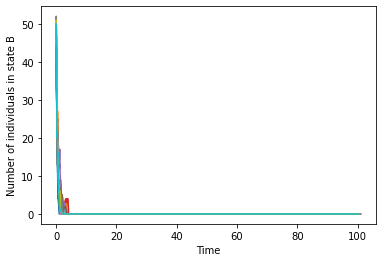

In [230]:
#Exploring the role of R0

#Small R0 
#N=100 and B0=50

num_realisations = 20

for n in range(num_realisations):
    gillespie_ABA_1(100,50,1,3,100)
    
#We can see that the population of B falls to 0 almost immediatley in this case 

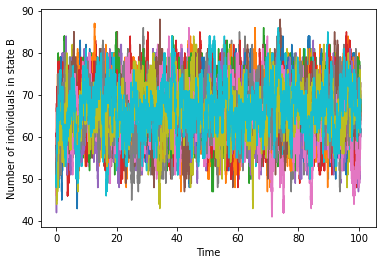

In [231]:
#Large R0
#Keeping N=100 and B0=50

for n in range(num_realisations):
    gillespie_ABA_1(100,50,3,1,100)

#When R0 is large, the number of the population of B fluctuates between about 85 and 45.
#This output suggests to me that for R0>1 the system might be what is known as 'marginally stable' or 'neutrally 
#stable'. This means the system is not asympotically stable or unstable. 

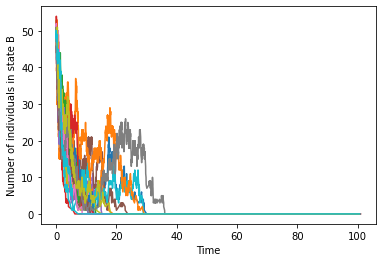

In [130]:
#R0 = 1
#Keeping N=100 and B0=50

for n in range(num_realisations):
    gillespie_ABA_1(100,50,1,1,100)

#The population of B settles to 0 after a while, as in agreement with previous analytical anlysis.
#Some realisations seems to reach 0 sooner than others.

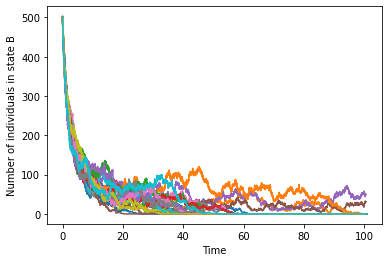

In [131]:
#Exploring the role of N

#Large N (increased by factor of 10)
#Kepping R0=1 and B0 at half N

for n in range(num_realisations):
    gillespie_ABA_1(1000,500,1,1,100)

#Some realisations seem to reach a population size of 0 whilst others do not. 
#Perpahs we would need to look at the sysetm over s longer time period to see all realistions reach 0 

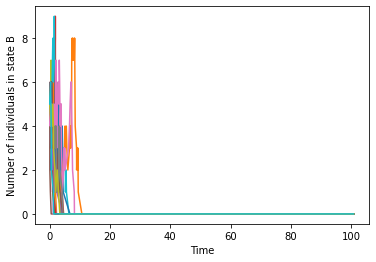

In [132]:
#Small N (decreased by factor of 10)
#Kepping R0=1 and B0 at half N

for n in range(num_realisations):
    gillespie_ABA_1(10,5,1,1,100)

#A small N means it takes all realisations a shorter amount of time to reach 0.
#It is interesting to see here that the number of individuals in B seems to go up at first and fluctuates before
#reaching 0. This most likley happens in the plots above but difficult to see on larger scales.  

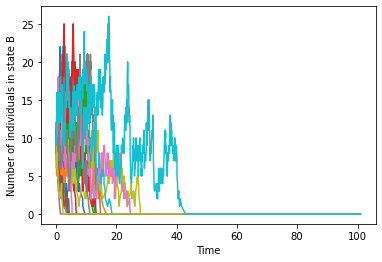

In [133]:
#Exploring the role of B0

#Small B0
#Keeping R0 = 1 and N=100 

for n in range(num_realisations):
    gillespie_ABA_1(100,10,1,1,100)

#As above we can see that even though B0=10 the population of B seems to fluctuate between 0 and 25 before it
#reaches 0, despite this the time it takes to reach 0 is fairly quick, because we are starting close to this.  

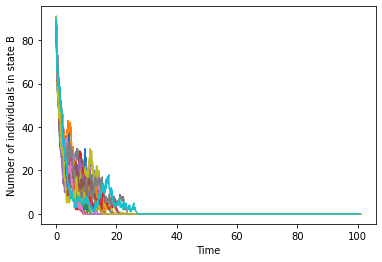

In [134]:
#Large B0
#Keeping R0 = 1 and N=100 

for n in range(num_realisations):
    gillespie_ABA_1(100,90,1,1,100)

#Slower to reach equilibrium when B0 starts further away from it.
#Falls quickly at first and then fluctuates for a while before reaching 0. 

Although I have tried to exaplain what changing R0, B0 and N does, thier effects on the sysetm cannot be isolated. I have had to choose values for each of the other two varaibles. If these were to be different my output could look quite different. 

Question 2:

For each scenario, calculate the average (and standard deviation) of the realisations. Here, you are going to face a problem linked with the nota bene from the introductory paragraph. You will need to think of a solution and implement
it. Superimpose the average (and error bars) to the realisations. Use a larger line width for visibility.
(11 marks)

As per the Nota Bene suggests I came across issues initially with the calcluation of the mean here. The issue was that becasue the algorithm uses exponentially distributed times to the next event, i had different length lists for T and B for each realisation, making finding the mean for B at each time point not possible.

As a solution to this i used interpolation. This means that missing data points for B, as a result of the differing timeline of events, are estimated based upon the known values for B we have.

In [320]:
#To check that the means and errror have plotted correctly i have plotted each of my graphs above again, now with
#thier corresponding mean line and error bars

def PlotMean_1(senario):

    results_T = []
    results_B = []
    mean_times = np.arange(100)
    for n in range(num_realisations):
        T,A,B = gillespie_ABA_1(senario[0], senario[1], senario[2], senario[3], senario[4])
        results_T.append(T) 
        results_B.append(B)
    
    #using numpy interpolation to fill any missing B values
    B_interpolate = np.array([np.interp(mean_times, results_T[i], results_B[i]) for i in range(len(results_T))])

    mean_B = np.mean(B_interpolate,axis=0)
    standard_dev_B = np.std(B_interpolate, axis=0)
    upperbar= []
    lowerbar = []
    for i in range(len(mean_times)):
        upperbar.append(mean_B[i]+standard_dev_B[i])
        lowerbar.append(mean_B[i]-standard_dev_B[i]) #creating standard deviation bars 
    plt.rcParams["figure.figsize"] = (8, 6)
    plt.fill_between(mean_times, upperbar, lowerbar, color= 'black', zorder=8, alpha=0.6)
    plt.plot(mean_times, mean_B, color= 'black', linewidth= 5)
    plt.show()                                                                                                  
                                                                                                                                     
                                                                                                                                     

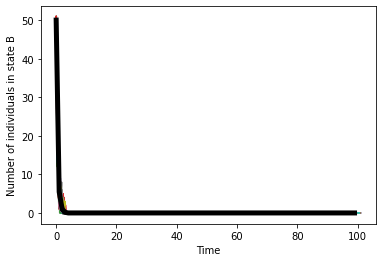

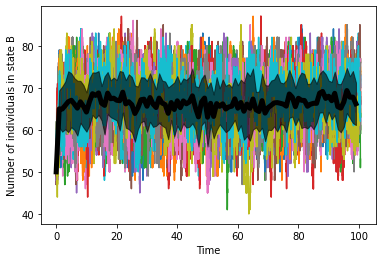

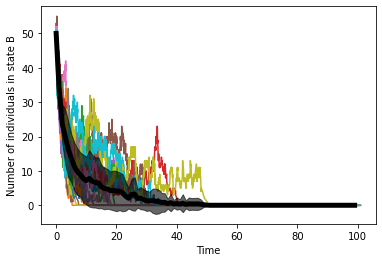

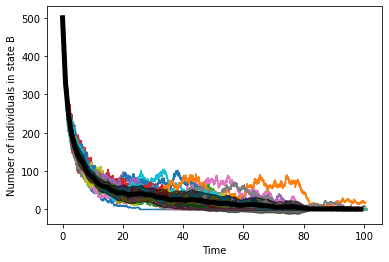

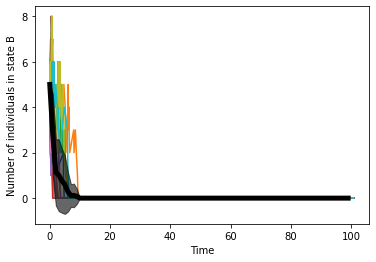

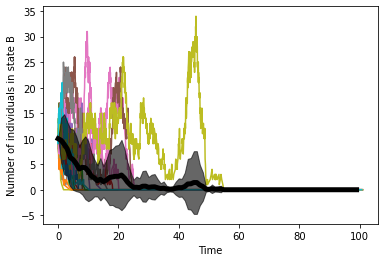

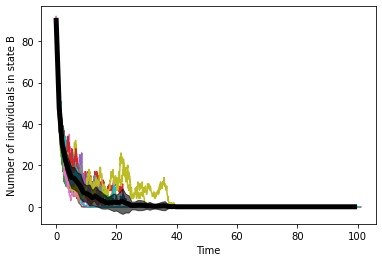

In [321]:
senario_1 = [[100,50,1,3,100],[100,50,3,1,100],[100,50,1,1,100],[1000,500,1,1,100],[10,5,1,1,100],[100,10,1,1,100],
             [100,90,1,1,100]]

for i in senario_1:
    PlotMean_1(i)
    
#The results here are as expected 

In [220]:
#Now for easier comparision, i have plotted all graphs on the same plot
#For this I needed to alter the gillespie algorithm to produce just one colour per senario so that i can distingush 
#between them on the graph 

def gillespie_ABA_2(N,B0,beta,gamma,Tmax,colour): #added colour

    A=[N-B0] # We cannot predict how many elements there will be unfortunately
    B=[B0]
    T=[0] 
    state = np.random.permutation([0]*(N-B0)+[1]*B0) # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise 
    B_contacts = np.where(state==1)[0] # Index of individuals in state B (state=1).
    rate_vector = B0*beta*np.ones((N,1))/N # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation). 
    rate_vector[B_contacts] = gamma # Update rate of B_contacts to be gamma (the rate for individuals in state B)
    
    time = 0
    while time<=Tmax+0.5: # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector) # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector) # Cumulated sum of rates
        if rate > 0.000001: # if rate is sufficiently large
            tstep = expovariate(rate) # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1]+tstep) # Time of next event
            event = np.where(cumrate>np.random.rand()*rate)[0][0] # Find which individual will see its state change 
            if state[event]==0: # individual is in state A 
                A.append(A[-1]-1) # this state A individual becomes state B so number of state A individuals is decreased
                B.append(B[-1]+1) # obviously, number of state B individuals is increased 
                state[event] = 1 # Update state vector
                rate_vector[event] = gamma # Change rate of individual to B->A rate, namely gamma
                A_contacts = np.where(state==0)[0] # List of state A individuals after change
                rate_vector[A_contacts] += beta/N # Update rate of state A individuals to account for the extra state B individual
            else: # individual is in state B
                B.append(B[-1]-1) # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1]+1) # obviously, number of state A individuals is increased
                state[event] = 0 # Update state vector
                A_contacts = np.where(state==0)[0] # List of state A individuals after changes                                
                rate_vector[A_contacts] = beta*len(np.where(state==1)[0])/N # Update rate of state A individuals based on number of B individuals  
        else: # Nothing will happen from now on so we can accelerate the process
            time = T[-1] # current time
            while time <= Tmax + 0.5:
                A.append(A[-1]) # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1]+0.5) # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop 
        time = T[-1] 
        
    plt.plot(T,B, color=colour)
                  
    plt.ylabel("Number of individuals in state B")                                               
    plt.xlabel("Time")
                  
        
    return T,A,B 

In [322]:
import matplotlib.patches as mpatches

def PlotMean_2(senario):
    
    colours = ['b','r','g','c','m','y','lime']
    texts = ['Samll R0, N=100, B0=50', 'Large R0, N=100, B0=50', 'R0=1, N=100, B0=50', 'Large N, R0=1, B0=250', 
             'Small N, R0=1, B0=5' , 'Small B0, N=100, R0=1', 'Large B0, N=100, R0=1']
    patches = [mpatches.Patch(color=colours[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]

    results_T = []
    results_B = []
    interpolate_B = np.array([[]])
    mean_times = np.arange(100)
    for n in range(num_realisations):
        T,A,B = gillespie_ABA_2(senario[0], senario[1], senario[2], senario[3], senario[4], senario[5])
        results_T.append(T)
        results_B.append(B)
    
    B_interpolate = np.array([np.interp(mean_times, results_T[i], results_B[i]) for i in range(len(results_T))])

    mean_B = np.mean(B_interpolate,axis=0)
    standard_dev_B = np.std(B_interpolate, axis=0)
    upperbar= []
    lowerbar = []
    for i in range(len(mean_times)):
        upperbar.append(mean_B[i]+standard_dev_B[i])
        lowerbar.append(mean_B[i]-standard_dev_B[i])
    plt.rcParams["figure.figsize"] = (15, 10) 
    plt.title("Mean B(in black) with error bars for varying R0, B0 and N values")
    plt.legend(handles=patches)
    plt.fill_between(mean_times, upperbar, lowerbar, color= 'black', zorder=5, alpha=0.6)
    plt.plot(mean_times, mean_B, color= 'black', linewidth= 5)
    

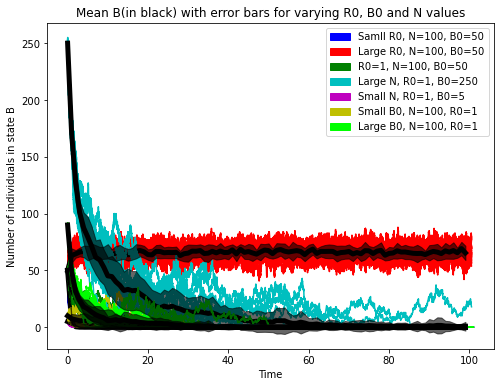

In [323]:
senario_2 = [[100,50,1,3,100,'b'],[100,50,3,1,100,'r'],[100,50,1,1,100,'g'],[500,250,1,1,100,'c'],
           [10,5,1,1,100,'m'],[100,10,1,1,100,'y'],[100,90,1,1,100,'lime']]

for i in senario_2:
    PlotMean_2(i)
    
#Again this is what we would expect if all the graphs above were to be put onto one graph 

In [325]:
#To imporve the graph further, i have produced a graph with a more comprehensive variety of all the combinations
#of parameters 

def PlotMean_3(senario):
    
    colours = ['b','g','r','c','m','y','lime','lightgrey','rosybrown','teal','lightsteelblue','indigo'] 
    texts = ['Samll R0, Large N, Small B0', 'R0=1, Large N, Small B0', 'Large R0, Large N, Small B0', 
             'Small R0, Small N, Small B0', 'R0=1, Small N, Small B0', 'Large R0, Small N, Small B0',
             'Small R0, Large N, Large B0', 'R0=1, Large N, Large B0', 'Large R0, Large N, Large B0',
             'Small R0, Small N, Large B0', 'R0=1, Small N, Large B0', 'Large R0, Small N, Large B0']
             
    patches = [mpatches.Patch(color=colours[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]

    results_T = []
    results_B = []
    interpolate_B = np.array([[]])
    mean_times = np.arange(100)
    for n in range(num_realisations):
        T,A,B = gillespie_ABA_2(senario[0], senario[1], senario[2], senario[3], senario[4], senario[5])
        results_T.append(T)
        results_B.append(B)
    
    B_interpolate = np.array([np.interp(mean_times, results_T[i], results_B[i]) for i in range(len(results_T))])

    mean_B = np.mean(B_interpolate,axis=0)
    standard_dev_B = np.std(B_interpolate, axis=0)
    upperbar= []
    lowerbar = []
    for i in range(len(mean_times)):
        upperbar.append(mean_B[i]+standard_dev_B[i])
        lowerbar.append(mean_B[i]-standard_dev_B[i])
    plt.rcParams["figure.figsize"] = (15, 10) #Made figure larger for better visibility, takes 2x runs to change
    plt.title("Mean B(in black) with error bars for varying R0, B0 and N values")
    plt.legend(handles=patches,loc='upper right')
    plt.fill_between(mean_times, upperbar, lowerbar, color= 'black', zorder=5, alpha=0.6)
    plt.plot(mean_times, mean_B, color= 'black', linewidth= 5)

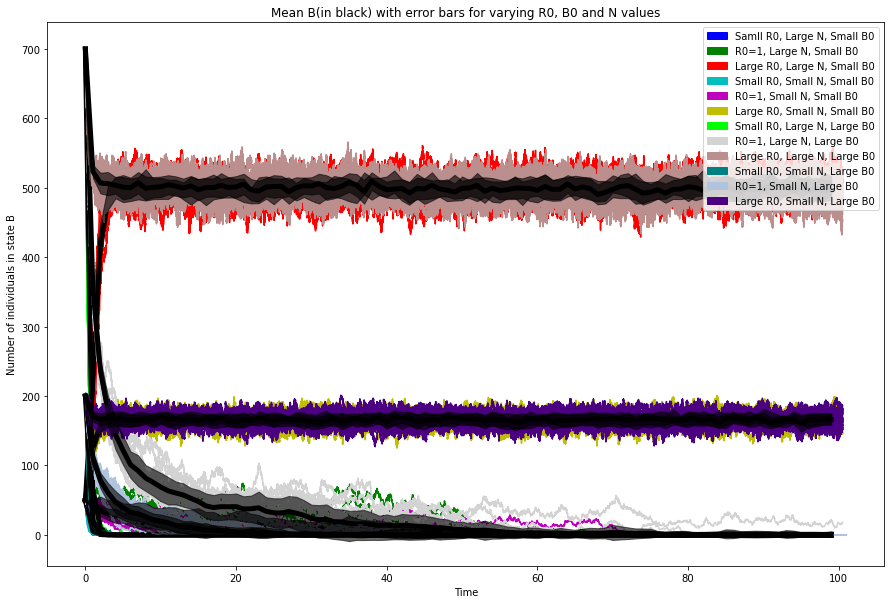

In [326]:
senario_3 = [[750,50,1,3,100,'b'],[750,50,1,1,100,'g'],[750,50,3,1,100,'r'],[250,50,1,3,100,'c'],[250,50,1,1,100,'m'],
           [250,50,3,1,100,'y'],[750,700,1,3,100,'lime'],[750,700,1,1,100,'lightgrey'],[750,700,3,1,100,'rosybrown'],
           [250,200,1,3,100,'teal'],[250,200,1,1,100,'lightsteelblue'],[250,200,3,1,100,'indigo']]
           
for i in senario_3:
    PlotMean_3(i)
    
#This runs pretty slowly, but there is quite a large amount of data

From this more comprehensive graph i now better understand the importance of the value of R0 and how this connects to some of my earlier analysis. There are only 4 senario's above that do not tend to 0, which are the senarios with Large R0(specifically R0=3). Thinking back to my Euler and bifurication plots this aligns with what was discovered; that the population of B will end up at 0 if R0 is less than or equal to 1. 

Question 3: Finally, superimpose the mean-field solution. Again, use a larger line width and different colour for visibility. Describe and interpret agreement between average of stochastic realisations and mean-field in relation to the choice of parameters.In this question, using B0 = 1 (i.e., only one individual in state B at t = 0) can help exacerbate the differences and help you think about what is happening. You may want to refer to your bifurcation plot.

In [248]:
#same code from anlaytical question 5

def myfunc(B, beta, gamma, N):
    dbdt = (beta * B/N * (N-B) - gamma * B) 
    return dbdt

In [347]:
#same code from anlaytical question 5 as i have integrated my mean-field equation here

h=0.1
t=np.arange(0,100+h,h)
b=np.zeros((len(t),1))
b[0]=50

def PlotEuler(beta, gamma):
    
    for i in np.arange(len(t)-1):
        b[i+1]= b[i] + h * myfunc(b[i], beta, gamma, N=750)
        
    R0= beta/gamma
    
    plt.plot(t,b, label=i, color = 'purple', linewidth = 5)
    plt.xlabel("Time")
    plt.ylabel("B(t)")
    plt.title("Euler's solution superimposed")
    
    
def PlotEuler_2(beta, gamma):
    
    for i in np.arange(len(t)-1):
        b[i+1]= b[i] + h * myfunc(b[i], beta, gamma, N=250) 
        
    R0= beta/gamma
    
    plt.plot(t,b, label=i, color = 'purple', linewidth = 5)

In [348]:
#I got rid of the error bars for this part otherwise it became very hard to see everything 

def PlotMean_last(senario):
    
    colours = ['b','g','r','c','lightgrey','y']
    texts = ['Samll R0, Large N, Small B0', 'R0=1, Large N, Small B0', 'Large R0, Large N, Small B0', 
             'Small R0, Small N, Small B0', 'R0=1, Small N, Small B0', 'Large R0, Small N, Small B0']
    
    patches = [mpatches.Patch(color=colours[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]

    results_T = []
    results_B = []
    interpolate_B = np.array([[]])
    mean_times = np.arange(100)
    for n in range(num_realisations):
        T,A,B = gillespie_ABA_2(senario[0], senario[1], senario[2], senario[3], senario[4], senario[5])
        results_T.append(T)
        results_B.append(B)
    
    B_interpolate = np.array([np.interp(mean_times, results_T[i], results_B[i]) for i in range(len(results_T))])

    mean_B = np.mean(B_interpolate,axis=0)

    plt.rcParams["figure.figsize"] = (15, 10) 
    plt.title("Mean B(in black)for varying R0, B0 and N values; Mean-field solution superimposed(in purple)")
    plt.legend(handles=patches)
    plt.plot(mean_times, mean_B, color= 'black', linewidth= 5)

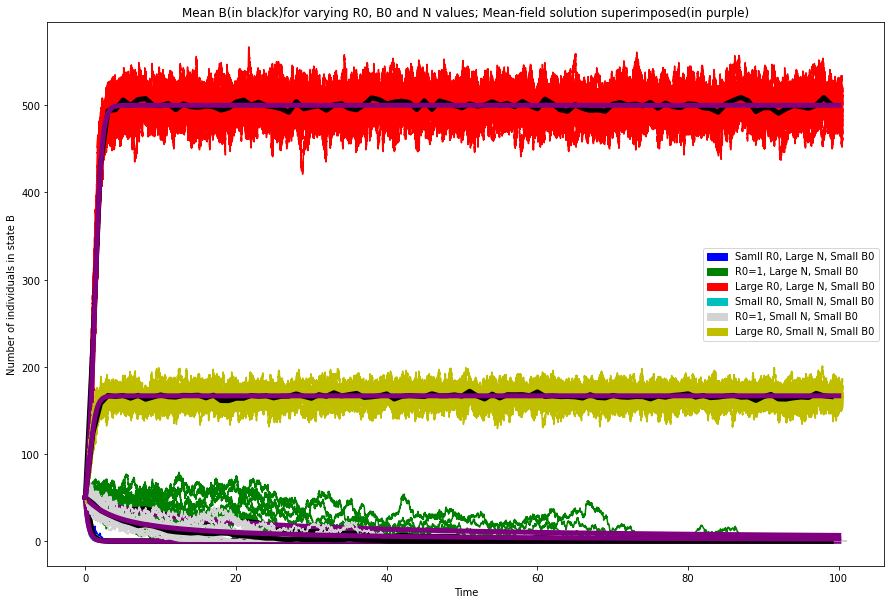

In [349]:
senario = [[750,50,1,3,100,'b'],[750,50,1,1,100,'g'],[750,50,3,1,100,'r'],[250,50,1,3,100,'c'],
           [250,50,1,1,100,'lightgrey'],[250,50,3,1,100,'y']]

PlotMean_last(senario[0])
PlotEuler(1,3)

PlotMean_last(senario[1])
PlotEuler(1,1)

PlotMean_last(senario[2])
PlotEuler(3,1)

PlotMean_last(senario[3])
PlotEuler_2(1,3)

PlotMean_last(senario[4])
PlotEuler_2(1,1)

PlotMean_last(senario[5])
PlotEuler_2(3,1)

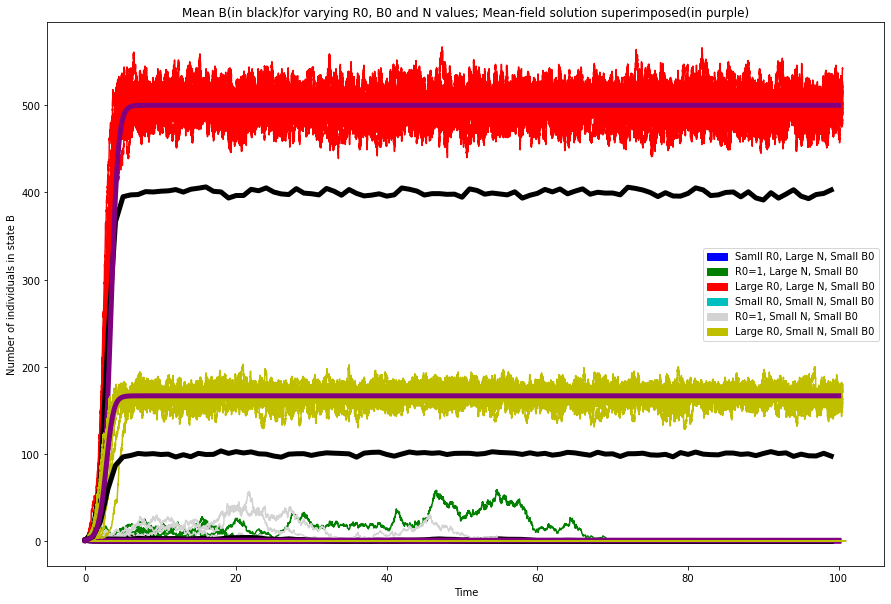

In [350]:
#Changing B0 to 1

b[0]=1

senario = [[750,1,1,3,100,'b'],[750,1,1,1,100,'g'],[750,1,3,1,100,'r'],[250,1,1,3,100,'c'],[250,1,1,1,100,'lightgrey'],
           [250,1,3,1,100,'y']]

PlotMean_last(senario[0])
PlotEuler(1,3)

PlotMean_last(senario[1])
PlotEuler(1,1)

PlotMean_last(senario[2])
PlotEuler(3,1)

PlotMean_last(senario[3])
PlotEuler_2(1,3)

PlotMean_last(senario[4])
PlotEuler_2(1,1)

PlotMean_last(senario[5])
PlotEuler_2(3,1)

At first when B0=50, the mean-field solution and average seemed to have near perfect agreement. However, when changing B0=1 the two had very poor agreement when R0 was large, although i am unsure to why this is the case. The mean i have calulated is way off the Euler solution, which appears to be right in the centre of the realisations. I am unsure how to imporve agreement between these. 

From my analysis, I can conclude that the value of B0 and N often have little effect on the outcome of the system and that it is really our R0 parameter that dictates where our system ends up at the end of our timeline. Our mean-field solution and calculated mean seem to be good estimations of the mean of several realisations of any given senario so long as B0 is not too low. 